<a href="https://colab.research.google.com/github/MaryDongsn/DL_RL/blob/master/CSI_5138_Assignment_3_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import numpy as np
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from keras.datasets import imdb
from keras.layers import Dense

max_features = 10000
embedding_dim = 32
maxlen = 500


(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [28]:
def trainModel(unit,modelType):
  if modelType == "LSTM":
    model = tf.keras.Sequential([
      layers.Embedding(max_features + 1, unit),
      layers.Dropout(0.1),
      layers.LSTM(unit),
      layers.Dropout(0.1),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation='sigmoid')])
  if modelType == "RNN":
        model = tf.keras.Sequential([
      layers.Embedding(max_features + 1, unit),
      layers.Dropout(0.1),
      layers.SimpleRNN(unit),
      layers.Dropout(0.1),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation='sigmoid')])

  model.summary()

  model.compile(loss=losses.BinaryCrossentropy(),
                optimizer='adam',
                metrics=tf.metrics.BinaryAccuracy())

  epochs = 30
  history = model.fit(
      input_train, y_train,
      batch_size=500,
      validation_split=0.2,
      epochs=epochs)

  test_loss, test_acc = model.evaluate(input_test, y_test)

  print('Test Loss: {}'.format(test_loss))
  print('Test Accuracy: {}'.format(test_acc))
  return history,  test_loss, test_acc

In [29]:
def experiment(modelType):
  global LSTM_test_acc_list
  global LSTM_test_loss_list
  global RNN_test_acc_list
  global RNN_test_loss_list
  global LSTM_train_history_list
  global RNN_train_history_list
  for unit in unitList:
    print(unit, modelType)
    result = trainModel(unit, modelType)
    train_history,test_loss, test_acc = result[0], result[1], result[2]
    if modelType == "LSTM":
      print("++++++LSTM")
      LSTM_test_acc_list = np.append(LSTM_test_acc_list, test_acc)
      LSTM_test_loss_list= np.append(LSTM_test_loss_list, test_loss)
      LSTM_train_history_list= np.append(LSTM_train_history_list, train_history)
    elif modelType == "RNN":
      print("________RNN")
      RNN_test_acc_list = np.append(RNN_test_acc_list, test_acc)
      RNN_test_loss_list= np.append(RNN_test_loss_list, test_loss)
      RNN_train_history_list= np.append(RNN_train_history_list, train_history)
    else:
      print("Incorrect model")
      break
unitList = [20,50,100,200,500]
LSTM_train_history_list = np.array([])
RNN_train_history_list = np.array([])
LSTM_test_acc_list = np.array([])
LSTM_test_loss_list = np.array([])
RNN_test_acc_list = np.array([])
RNN_test_loss_list = np.array([])
experiment("LSTM")
experiment("RNN")

20 LSTM
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, None, 20)          200020    
_________________________________________________________________
dropout_32 (Dropout)         (None, None, 20)          0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dropout_33 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 65        
Total params: 204,709
Trainable params: 204,709
Non-trainable params: 0
_______________________________________

Text(0.5, 1.0, 'Loss for different state dimension')

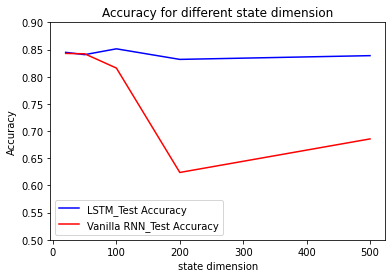

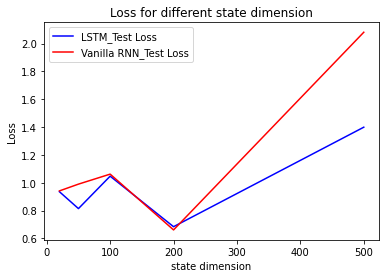

In [34]:
fig, ax = plt.subplots()
sns.lineplot(x=unitList, y = LSTM_test_acc_list, color='blue', label='LSTM_Test Accuracy', ax=ax)
sns.lineplot(x=unitList, y = RNN_test_acc_list, color='red', label='Vanilla RNN_Test Accuracy', ax=ax)
plt.xlabel('state dimension')
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.9])
plt.title('Accuracy for different state dimension')
fig, ax = plt.subplots()
sns.lineplot(x=unitList, y = LSTM_test_loss_list, color='blue', label='LSTM_Test Loss', ax=ax)
sns.lineplot(x=unitList, y = RNN_test_loss_list, color='red', label='Vanilla RNN_Test Loss', ax=ax)
plt.xlabel('state dimension')
plt.ylabel('Loss')
plt.title('Loss for different state dimension')

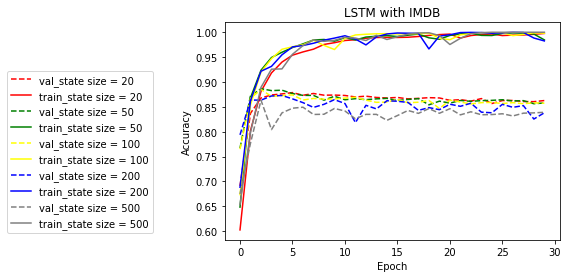

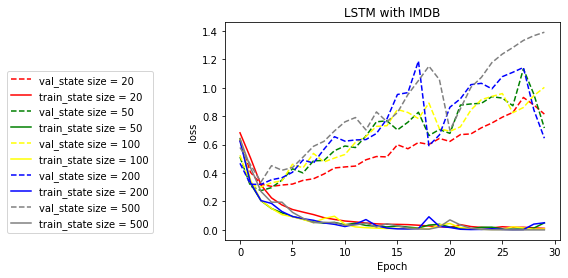

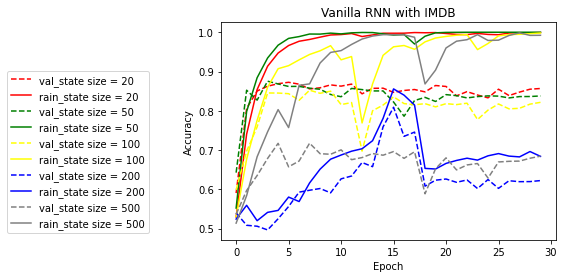

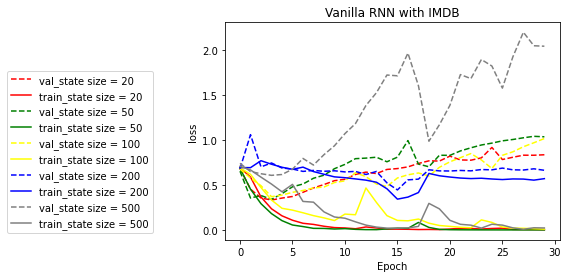

In [35]:
colour_list = ["red", 'green', 'yellow','blue','grey',]
def LSTM_plot_acc():
  index = 0
  fig, ax = plt.subplots()
  while index<len(unitList):
    plt.plot(LSTM_train_history_list[index].history['val_binary_accuracy'], label='val_state size = %s'%(unitList[index]),linestyle='dashed',color = colour_list[index] )
    plt.plot(LSTM_train_history_list[index].history['binary_accuracy'], label='train_state size = %s'%(unitList[index]), color = colour_list[index] )
    index=index+1
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('LSTM with IMDB')
  #plt.ylim([0.7, 1])
  plt.legend( bbox_to_anchor=(-0.2, 0.8))


def LSTM_plot_loss():
  index = 0
  fig, ax = plt.subplots()

  while index<len(unitList):
    plt.plot(LSTM_train_history_list[index].history['val_loss'], label='val_state size = %s'%(unitList[index]) ,linestyle='dashed', color = colour_list[index])
    plt.plot(LSTM_train_history_list[index].history['loss'], label='train_state size = %s'%(unitList[index]), color = colour_list[index] )
    index=index+1
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.title('LSTM with IMDB')
  #plt.ylim([0.7, 1])
  plt.legend( bbox_to_anchor=(-0.2, 0.8))

def RNN_plot_acc():
  index = 0
  fig, ax = plt.subplots()
  while index<len(unitList):
    plt.plot(RNN_train_history_list[index].history['val_binary_accuracy'], label='val_state size = %s'%(unitList[index]),linestyle='dashed', color = colour_list[index] )
    plt.plot(RNN_train_history_list[index].history['binary_accuracy'], label='rain_state size = %s'%(unitList[index]), color = colour_list[index] )
    index=index+1
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Vanilla RNN with IMDB')
  #plt.ylim([0.7, 1])
  plt.legend( bbox_to_anchor=(-0.2, 0.8))


def RNN_plot_loss():
  index = 0
  fig, ax = plt.subplots()
  while index<len(unitList):
    plt.plot(RNN_train_history_list[index].history['val_loss'], label='val_state size = %s'%(unitList[index]),linestyle='dashed', color = colour_list[index] )
    plt.plot(RNN_train_history_list[index].history['loss'], label='train_state size = %s'%(unitList[index]), color = colour_list[index] )
    index=index+1
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.title('Vanilla RNN with IMDB')
  #plt.ylim([0.7, 1])
  plt.legend( bbox_to_anchor=(-0.2, 0.8))

LSTM_plot_acc()
LSTM_plot_loss()

RNN_plot_acc()
RNN_plot_loss()